<a href="https://colab.research.google.com/github/JimKing100/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Notes_on_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments

#### Set theory and probability - permutations, combinations, expected values, variance, binomial distribution and Bernoulli trials

In [19]:
# A Python program to print all permutations using library function 
from itertools import permutations 

perm = permutations([1, 2, 3]) 
for i in list(perm): 
  print(i)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


In [20]:
# A Python program to print all combinations of given length 
from itertools import combinations 
 
comb = combinations([1, 2, 3], 2) 
for i in list(comb): 
    print(i) 

(1, 2)
(1, 3)
(2, 3)


#### Mean, variance and standard deviation

In [21]:
# Imports
from numpy import array
from numpy import mean
from numpy import var
from numpy import std

# Mean of one array
v = array([1,2,3,4,5,6])
print(v)
result = mean(v)
print(result, '\n')

# Mean of a matrix (column and row) means
M = array([[1,2,3,4,5,6],[1,2,3,4,5,6]])
print(M)
col_mean = mean(M, axis=0)
print(col_mean)
row_mean = mean(M, axis=1)
print(row_mean, '\n')

# Variance of one array
v = array([1,2,3,4,5,6])
print(v)
result = var(v, ddof=1)
print(result, '\n')

# Variance of a matrix
M = array([[1,2,3,4,5,6],[1,2,3,4,5,6]])
print(M)
col_mean = var(M, ddof=1, axis=0)
print(col_mean)
row_mean = var(M, ddof=1, axis=1)
print(row_mean, '\n')

# Standard deviation
M = array([[1,2,3,4,5,6],[1,2,3,4,5,6]])
print(M)
col_mean = std(M, ddof=1, axis=0)
print(col_mean)
row_mean = std(M, ddof=1, axis=1)
print(row_mean)

[1 2 3 4 5 6]
3.5 

[[1 2 3 4 5 6]
 [1 2 3 4 5 6]]
[1. 2. 3. 4. 5. 6.]
[3.5 3.5] 

[1 2 3 4 5 6]
3.5 

[[1 2 3 4 5 6]
 [1 2 3 4 5 6]]
[0. 0. 0. 0. 0. 0.]
[3.5 3.5] 

[[1 2 3 4 5 6]
 [1 2 3 4 5 6]]
[0. 0. 0. 0. 0. 0.]
[1.87082869 1.87082869]


#### Expected values and chi-square test (also create a subset of a dataframe)

In [22]:
# Expected value for a table
import pandas as pd
import numpy as np

# Create the education table
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()
# Observed values
df.sort_values(by='education', ascending=True)
contingency_table = pd.crosstab(df['sex'], df['education'], margins=True)
# Create a subset of just high school, bachelors, masters and doctorate
education_table = contingency_table[[' 12th', ' Bachelors', ' Masters', ' Doctorate']]
# Create a sum column
education_table['All'] = education_table.apply(lambda row: row[' 12th'] + row[' Bachelors'] + row[' Masters'] + row[' Doctorate'], axis=1)
education_table

(32561, 15)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


education,12th,Bachelors,Masters,Doctorate,All
sex,,,,,
Female,144,1619,536,86,2385
Male,289,3736,1187,327,5539
All,433,5355,1723,413,7924


In [31]:
# Test to create the observed values
education_table.iloc[:-1,:-1].values

array([[ 144, 1619,  536,   86],
       [ 289, 3736, 1187,  327]])

In [32]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(education_table.iloc[:-1,:-1])
print(chi_squared, p_value, dof, expected)

19.821810981923182 0.0001848038984063399 3 [[ 130.32622413 1611.77120141  518.59603735  124.3065371 ]
 [ 302.67377587 3743.22879859 1204.40396265  288.6934629 ]]


#### Binomial Distribution

In [7]:
# Binomial distribution  - number of trials, probability of each trial
# Result of flipping a coin ten times, tested 1000 times
n, p = 10, .5  
s = np.random.binomial(n, p, 1000)
print(s[0:10], '\n')

# A company drills 9 wild-cat oil exploration wells 
# each with an estimated probability of success of 0.1
# All nine wells fail. What is the probability of that happening?
# 20,000 trials of the model counting the number that generate zero positive results.
wells_probability = sum(np.random.binomial(9, 0.1, 20000) == 0)/20000.
print(wells_probability)

[6 9 8 6 7 4 4 5 5 8] 

0.38705


#### Drawing samples from multiple probability distributions

In [0]:
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import bernoulli
from scipy.stats import binom

import seaborn as sns

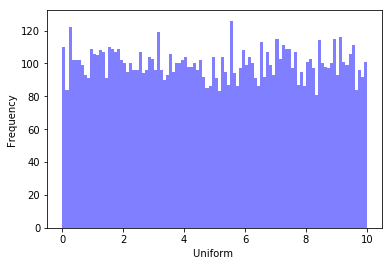

In [9]:
# random numbers from uniform distribution
# Generate 10 numbers from 0 to 10
n = 10000
a = 0
b = 10
data_uniform = uniform.rvs(size=n, loc = a, scale=b)

ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=False,
                  color='blue',
                  hist_kws={"linewidth": 5,'alpha':.5})
ax.set(xlabel='Uniform ', ylabel='Frequency');

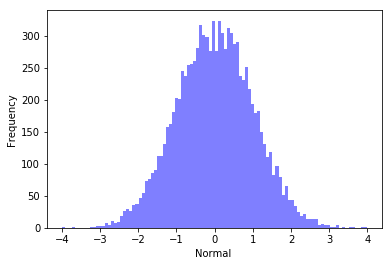

In [10]:
# random numbers from normal distribution
# Generate 10,000 random numbers from normal distribution mean=0 and variance=1
data_normal = norm.rvs(size=10000,loc=0,scale=1)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=False,
                  color='blue',
                  hist_kws={"linewidth": 5,'alpha':.5})
ax.set(xlabel='Normal ', ylabel='Frequency');

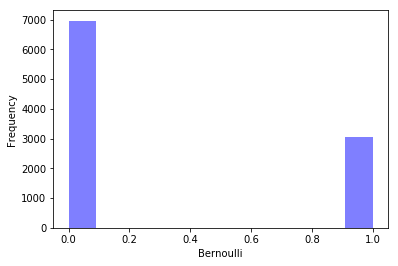

In [11]:
# random numbers from bernoulli distribution (0 or 1)
# Generate 10,000 Bernoulli random numbers with success prob p=0.3
data_bern = bernoulli.rvs(size=10000,p=0.3)
ax= sns.distplot(data_bern,
                 kde=False,
                 color="blue",
                 hist_kws={"linewidth": 5,'alpha':.5})
ax.set(xlabel='Bernoulli', ylabel='Frequency');

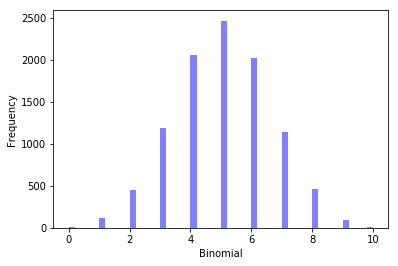

In [12]:
# random numbers from binomial distribution - # successes in 10 Bernoulli trials with p=0.5
data_binom = binom.rvs(n=10,p=0.5,size=10000)
ax = sns.distplot(data_binom,
                  kde=False,
                  color='blue',
                  hist_kws={"linewidth": 5,'alpha':.5})
ax.set(xlabel='Binomial', ylabel='Frequency');


#### Importance of statistics in the context of informing a practical and reliable understanding of the data

Statistical knowledge helps you use the proper methods to collect the data, employ the correct analyses, and effectively present the results.

Statistics allow you to evaluate claims based on quantitative evidence and help you differentiate between reasonable and dubious conclusions. 



#### Hypothesis testing to determine an outcome is significant or just due to chance 

In [13]:
# One sample t-test
# Checking to see if average age is 30 - the null hypothesis

from scipy.stats import ttest_1samp
import numpy as np

ages = [10, 20, 30, 40, 50, 60, 65, 75, 80, 90]
print(ages)
ages_mean = np.mean(ages)
print(ages_mean)
tset, pval = ttest_1samp(ages, 30)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

[10, 20, 30, 40, 50, 60, 65, 75, 80, 90]
52.0
p-values 0.028417492065723665
we are rejecting null hypothesis


In [14]:
# Two sample t-test
# Checking to see if NBA players and NFL players have the same average height - the null hypothesis
from scipy.stats import ttest_ind
import numpy as np

nba_heights = [74, 80, 74, 85, 76, 81, 82, 76, 83, 81, 77, 76, 83, 80, 81]
nfl_heights = [71, 70, 76, 74, 81, 70, 78, 77, 75, 74, 73, 71, 76, 78, 71]

nba_mean = np.mean(nba_heights)
nfl_mean = np.mean(nfl_heights)
print('nba mean value:', nba_mean)
print('nfl mean value:', nfl_mean)
nba_std = np.std(nba_heights)
nfl_std = np.std(nfl_heights)
print('nba std value:', nba_std)
print('nfl std value:', nfl_std)
ttest,pval = ttest_ind(nba_heights, nfl_heights)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

nba mean value: 79.26666666666667
nfl mean value: 74.33333333333333
nba std value: 3.3757303736459106
nfl std value: 3.2386554137309655
p-value 0.00048582427681116296
we reject null hypothesis


#### Determine the level of confidence for a possible outcome

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)

#### Derive Bayes theorem from the Law of Conditional Probability

P(A|B) = P(A^B)/P(B) or P(A^B)=P(A|B)P(B) *multiply by P(B)*

P(B|A) = P(A^B)/P(A) or P(A^B)=P(B|A)P(A) *multiply by P(A)*

P(A|B)P(B) = P(B|A)P(A) *equal P(A^B)s*

P(A|B)=P(B|A)P(A)/P(B) *divide by p(B)*

#### Calculate Bayesian confidence intervals

In [16]:
from scipy import stats

data = [6, 9, 12, 7, 8, 8, 13]
mean, var, std = stats.bayes_mvs(data)
print(mean)
print(var)
print(std)
print('\n')

print(mean.statistic)
print(mean.minmax[0])
print(mean.minmax[1])

Mean(statistic=9.0, minmax=(7.103650222612533, 10.896349777387467))
Variance(statistic=10.0, minmax=(3.1767242068607078, 24.45910382133402))
Std_dev(statistic=2.9724954732045084, minmax=(1.7823367265645143, 4.945614605014631))


9.0
7.103650222612533
10.896349777387467


#### Deploy a simple static (front-end) A/B-instrumented webpage

In [0]:
# See A/B Test example from class

#### Evaluate and summarize findings from real-world A/B test data